In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
sns.set()
%matplotlib inline

# Logistic regression

## Collecting Data

In [4]:
df = pd.read_csv("titanic_dataset.csv")

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df['PassengerId'].size

891

## Analysis

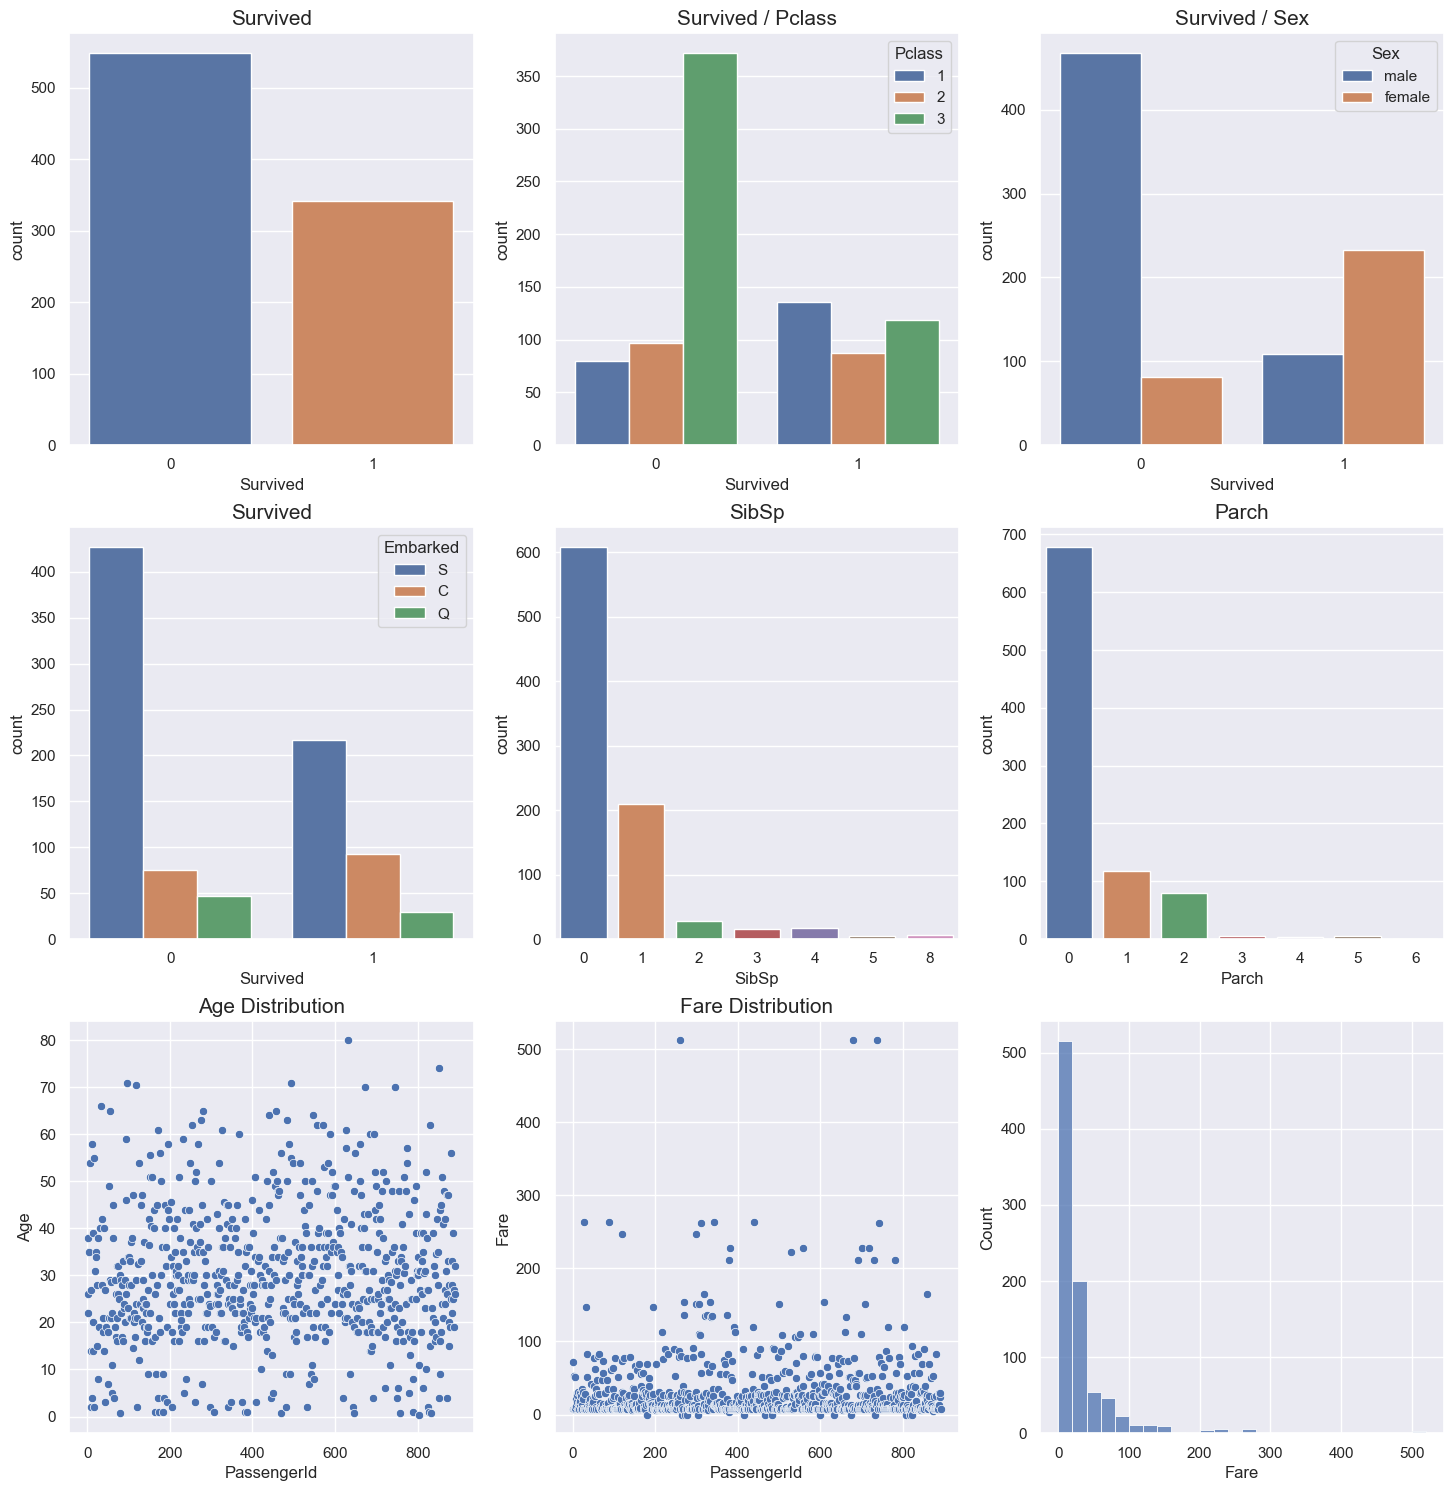

In [8]:
fig = plt.figure(figsize = (10,10))
fig.clf()

gs = GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])       
ax5 = fig.add_subplot(gs[1,1])  
ax6 = fig.add_subplot(gs[1,2])  
ax7 = fig.add_subplot(gs[2,0])  
ax8 = fig.add_subplot(gs[2,1])  
ax9 = fig.add_subplot(gs[2,2])

sns.countplot(x = 'Survived',data = df, ax=ax1)
ax1.set_title("Survived", fontsize = 15)

sns.countplot(x = 'Survived',hue = 'Pclass', data = df, ax=ax2)
ax2.set_title("Survived / Pclass", fontsize = 15)

sns.countplot(x = 'Survived',hue = 'Sex', data = df, ax=ax3)
ax3.set_title("Survived / Sex", fontsize = 15)

sns.countplot(x = 'Survived',hue = 'Embarked', data = df, ax=ax4)
ax4.set_title("Survived", fontsize = 15)

sns.countplot(x = 'SibSp', data = df, ax=ax5)
ax5.set_title("SibSp", fontsize = 15)

sns.countplot(x = 'Parch', data = df, ax=ax6)
ax6.set_title("Parch", fontsize = 15)

sns.scatterplot(x = df['PassengerId'], y = df['Age'], ax = ax7)
ax7.set_title("Age Distribution", fontsize = 15)

sns.scatterplot(x = df['PassengerId'], y = df['Fare'], ax = ax8)
ax8.set_title("Fare Distribution", fontsize = 15)

sns.histplot(x = 'Fare', data = df,binwidth = 20, ax=ax9)

#fig.suptitle("Data Set Analysis")
#fig.tight_layout()

plt.subplots_adjust(bottom=0.1, right=1.5, top=1.5)

plt.show()

## Data Wrangling

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

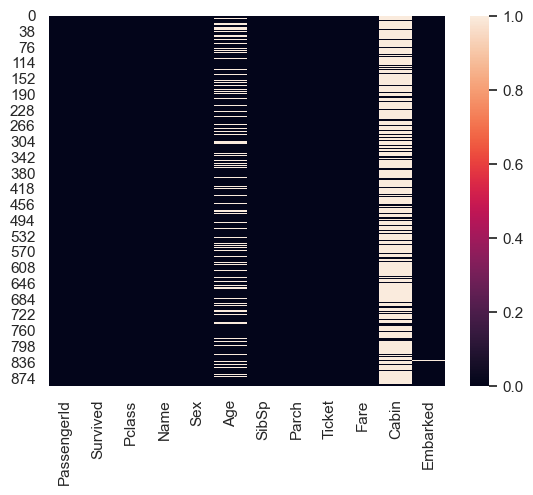

In [10]:
sns.heatmap(df.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

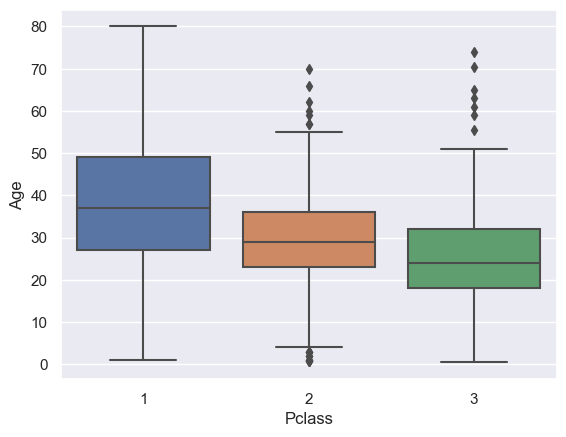

In [11]:
sns.boxplot(x = 'Pclass', y= 'Age', data = df)

In [12]:
df.drop('Cabin', axis = 1, inplace = True)

In [13]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [14]:
df.dropna(inplace = True)

<Axes: >

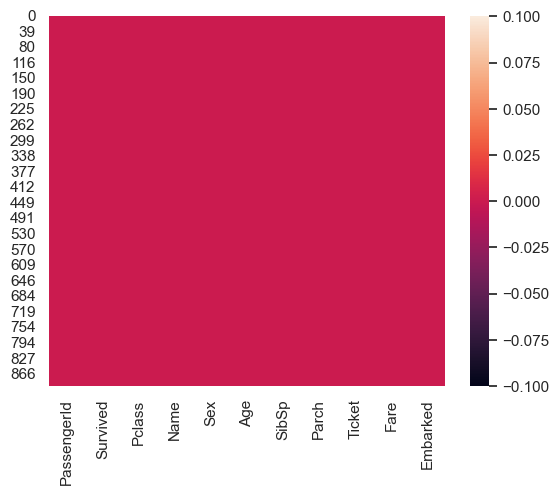

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
pcl = pd.get_dummies(df['Pclass'], drop_first = True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [20]:
df = pd.concat([df, sex, embark, pcl], axis = 1)

In [21]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [22]:
df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'],axis = 1, inplace = True)

In [23]:
df.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [31]:
df.dropna(axis = 0, inplace = True)

In [32]:
df

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


## Train and Test Data

In [60]:
x = df.drop('Survived', axis = 1)

In [61]:
y = df['Survived']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [108]:
model = LogisticRegression(solver='lbfgs')

In [109]:
model.fit(X_train.values, y_train.values)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
y_pred = model.predict(X_test.values)

In [111]:
(classification_report(y_test, y_pred))

'              precision    recall  f1-score   support\n\n           0       0.82      0.82      0.82       218\n           1       0.71      0.72      0.72       138\n\n    accuracy                           0.78       356\n   macro avg       0.77      0.77      0.77       356\nweighted avg       0.78      0.78      0.78       356\n'

In [112]:
confusion_matrix(y_test, y_pred)

array([[178,  40],
       [ 38, 100]], dtype=int64)

In [113]:
accuracy_score(y_test, y_pred)

0.7808988764044944